In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image 
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD #Adadelta, Adagrad, Adam, Adamax, K, Nadam, RMSprop, SGD, TFOptimizer

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../../data/raw/Udemy_Zero_to_deep_learning_Mosconi/user_visit_duration.csv')
X = df['Time (min)']
y = df.Buy

In [3]:
from keras.wrappers.scikit_learn import KerasClassifier  #, BaseWrapper, KerasRegressor

In [4]:
def buildLogisticRegressionModel():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,),activation='sigmoid'))
    model.compile(SGD(lr=0.5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [5]:
model = KerasClassifier(build_fn=buildLogisticRegressionModel, epochs=10)

In [6]:
from sklearn.model_selection import KFold, cross_val_score

In [7]:
cv = KFold(n_splits=3, shuffle=True)

In [8]:
scores = cross_val_score(estimator=model, X=X, y=y, cv=cv)

Epoch 1/10
66/66 [==============================] - 2s 25ms/step - loss: 0.6493 - acc: 0.5303
Epoch 2/10
66/66 [==============================] - 0s 299us/step - loss: 0.6234 - acc: 0.5909
Epoch 3/10
66/66 [==============================] - 0s 541us/step - loss: 0.5854 - acc: 0.7727
Epoch 4/10
66/66 [==============================] - 0s 654us/step - loss: 0.5475 - acc: 0.8485
Epoch 5/10
66/66 [==============================] - 0s 1ms/step - loss: 0.5315 - acc: 0.8333
Epoch 6/10
66/66 [==============================] - 0s 655us/step - loss: 0.5066 - acc: 0.7727
Epoch 7/10
66/66 [==============================] - 0s 411us/step - loss: 0.5478 - acc: 0.6970
Epoch 8/10
66/66 [==============================] - 0s 220us/step - loss: 0.4894 - acc: 0.7879
Epoch 9/10
66/66 [==============================] - 0s 364us/step - loss: 0.4765 - acc: 0.7727
Epoch 10/10
34/34 [==============================] - 0s 11ms/step
Epoch 1/10
67/67 [==============================] - 2s 24ms/step - loss: 1.1057 - 

In [9]:
scores # for each fold

array([0.64705882, 0.75757576, 0.90909091])

In [10]:
scores.mean(), scores.std()

(0.7712418300653595, 0.10740972835795724)

### Feature Scaling

In [11]:
df = pd.read_csv('../../data/raw/Udemy_Zero_to_deep_learning_Mosconi/weight-height.csv')

In [12]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


#### Dummies

In [13]:
pd.get_dummies(df.Gender, prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


#### Fixed_factor

In [14]:
(df.Height / 12.0).head()

0    6.153918
1    5.731825
2    6.175842
3    5.977582
4    5.823483
Name: Height, dtype: float64

In [15]:
(df.Height / 12.0).head().round(2)

0    6.15
1    5.73
2    6.18
3    5.98
4    5.82
Name: Height, dtype: float64

In [16]:
df['fatored_weight'] = (df['Weight'] / 12.0)

In [17]:
df.describe()

,Height,Weight,fatored_weight
count,10000.000000,10000.000000,10000.000000
mean,66.367560,161.440357,13.453363
std,3.847528,32.108439,2.675703
min,54.263133,64.700127,5.391677
25%,63.505620,135.818051,11.318171
50%,66.318070,161.212928,13.434411
75%,69.174262,187.169525,15.597460
max,78.998742,269.989699,22.499142


#### MinMaxScaler

In [18]:
from sklearn.preprocessing import MinMaxScaler
mmScaler = MinMaxScaler()
df['scaled_weight'] = mmScaler.fit_transform(df[['Weight']])

In [19]:
df.describe()  # refer to scaled_weight's min and max values

,Height,Weight,fatored_weight,scaled_weight
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,66.367560,161.440357,13.453363,0.471238
std,3.847528,32.108439,2.675703,0.156406
min,54.263133,64.700127,5.391677,0.000000
25%,63.505620,135.818051,11.318171,0.346427
50%,66.318070,161.212928,13.434411,0.470130
75%,69.174262,187.169525,15.597460,0.596569
max,78.998742,269.989699,22.499142,1.000000


#### Standard Scaler

In [20]:
from sklearn.preprocessing import StandardScaler
sScaler = StandardScaler()
df['std_scaled_weight'] = sScaler.fit_transform(df[['Weight']])

In [21]:
df.describe().round(2)  # refer to std_scaled_weight's mean and std

,Height,Weight,fatored_weight,scaled_weight,std_scaled_weight
count,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,13.45,0.47,-0.00
std,3.85,32.11,2.68,0.16,1.00
min,54.26,64.70,5.39,0.00,-3.01
25%,63.51,135.82,11.32,0.35,-0.80
50%,66.32,161.21,13.43,0.47,-0.01
75%,69.17,187.17,15.60,0.60,0.80
max,79.00,269.99,22.50,1.00,3.38


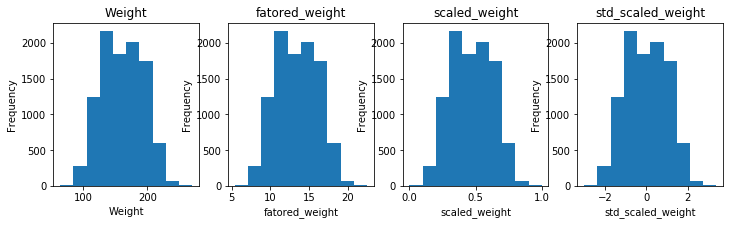

In [22]:
plt.figure(figsize=(12,3))

for i, feature in enumerate(['Weight',	'fatored_weight', 'scaled_weight',	'std_scaled_weight']):
    plt.subplot(1,4,i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

### TO DO: Excercise1

### TO DO: Excercise2

In [20]:
#END